In [2]:
import numpy as np
import pandas as pd
from numpy import nan
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold
from lofo import LOFOImportance, Dataset, plot_importance
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [3]:
data_df = pd.read_csv("D:/Datasets/PHME21/df_cleaned.csv")
df = data_df.copy()
df

,CpuTemperature_vMax,CpuTemperature_vMin,CpuTemperature_vStd,CpuTemperature_value,DurationPickToPick_vCnt,DurationPickToPick_vFreq,DurationPickToPick_vMax,DurationPickToPick_vMin,DurationPickToPick_vStd,DurationPickToPick_vTrend,...,VacuumValveClosed_vMin,VacuumValveClosed_vStd,VacuumValveClosed_vTrend,VacuumValveClosed_value,ValidFrame_vCnt,ValidFrame_vFreq,ValidFrameOptrisPIIRCamera_vCnt,ValidFrameOptrisPIIRCamera_vFreq,class,run
0,56.75,44.75,3.523729,47.833333,0.0,0.000000,3.192,2.807,0.192500,0.3850,...,-0.715812,0.112918,-0.013857,-0.580892,89.0,11.457455,259.0,27.582899,0,0
1,48.75,42.25,2.395308,45.000000,2.0,0.198207,3.192,2.807,0.192500,0.3850,...,-0.715812,0.112918,-0.013857,-0.580892,114.0,11.299041,273.0,27.058227,0,0
2,47.50,42.00,2.085815,43.825000,3.0,0.296778,3.230,3.106,0.051674,0.0200,...,-0.721671,0.109421,-0.008111,-0.596008,114.0,11.277551,272.0,26.907842,0,0
3,48.25,42.25,1.853375,45.200000,3.0,0.298541,3.307,3.103,0.085391,0.0310,...,-0.745598,0.116748,-0.002082,-0.595118,114.0,11.344572,271.0,26.968238,0,0
4,50.00,42.50,2.661766,45.700000,3.0,0.298554,3.242,3.153,0.038577,-0.0360,...,-0.720206,0.112639,-0.001516,-0.615755,113.0,11.245550,271.0,26.969415,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57966,62.00,55.00,1.920449,58.175000,4.0,0.398837,3.338,3.150,0.071434,-0.0326,...,-0.774895,0.114042,-0.006810,-0.660989,113.0,11.290777,270.0,26.977955,12,3
57967,61.75,56.00,1.902137,58.525000,2.0,0.199656,3.139,3.102,0.018500,-0.0370,...,-0.803217,0.136381,-0.010167,-0.671295,113.0,11.269392,270.0,26.926866,12,3
57968,61.75,55.25,2.064582,58.750000,3.0,0.299187,4.818,3.176,0.773340,-0.8210,...,-0.825190,0.128678,0.008731,-0.684622,114.0,11.366857,270.0,26.921505,12,3
57969,63.25,55.75,2.242271,57.833333,2.0,0.199835,3.375,3.263,0.056000,-0.1120,...,-0.764153,0.150226,0.061184,-0.660927,113.0,11.280370,270.0,26.953136,12,3


In [4]:
refinement_folds = {0: [100, 103, 10, 13, 26, 28, 42, 44, 49, 51, 58, 61, 64, 69, 73, 82, 89, 92, 94, 99],
                    4: [1, 2, 4],
                    11: [0, 1, 3],
                    12: [0, 1, 3]
                    }

for key, value in refinement_folds.items():
    df = df.loc[~((df["class"] == key) & df["run"].isin(value))]
df = df.reset_index(drop=True)
df

,CpuTemperature_vMax,CpuTemperature_vMin,CpuTemperature_vStd,CpuTemperature_value,DurationPickToPick_vCnt,DurationPickToPick_vFreq,DurationPickToPick_vMax,DurationPickToPick_vMin,DurationPickToPick_vStd,DurationPickToPick_vTrend,...,VacuumValveClosed_vMin,VacuumValveClosed_vStd,VacuumValveClosed_vTrend,VacuumValveClosed_value,ValidFrame_vCnt,ValidFrame_vFreq,ValidFrameOptrisPIIRCamera_vCnt,ValidFrameOptrisPIIRCamera_vFreq,class,run
0,56.75,44.75,3.523729,47.833333,0.0,0.000000,3.192,2.807,0.192500,0.385,...,-0.715812,0.112918,-0.013857,-0.580892,89.0,11.457455,259.0,27.582899,0,0
1,48.75,42.25,2.395308,45.000000,2.0,0.198207,3.192,2.807,0.192500,0.385,...,-0.715812,0.112918,-0.013857,-0.580892,114.0,11.299041,273.0,27.058227,0,0
2,47.50,42.00,2.085815,43.825000,3.0,0.296778,3.230,3.106,0.051674,0.020,...,-0.721671,0.109421,-0.008111,-0.596008,114.0,11.277551,272.0,26.907842,0,0
3,48.25,42.25,1.853375,45.200000,3.0,0.298541,3.307,3.103,0.085391,0.031,...,-0.745598,0.116748,-0.002082,-0.595118,114.0,11.344572,271.0,26.968238,0,0
4,50.00,42.50,2.661766,45.700000,3.0,0.298554,3.242,3.153,0.038577,-0.036,...,-0.720206,0.112639,-0.001516,-0.615755,113.0,11.245550,271.0,26.969415,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39606,63.50,55.75,2.209214,58.475000,3.0,0.297559,3.257,2.949,0.131006,-0.038,...,-0.753410,0.169011,-0.011318,-0.574508,114.0,11.335251,271.0,26.946081,9,5
39607,66.00,55.00,3.314740,58.750000,3.0,0.298891,4.280,3.183,0.496664,0.502,...,-0.814447,0.149156,-0.009829,-0.680935,113.0,11.253684,270.0,26.889352,9,5
39608,61.25,55.00,1.786232,58.375000,2.0,0.198411,4.259,2.745,0.757000,1.514,...,-0.806635,0.133540,-0.010159,-0.651936,114.0,11.307226,272.0,26.978629,9,5
39609,60.75,56.00,1.555032,58.725000,0.0,0.000000,4.259,2.745,0.757000,1.514,...,-0.806635,0.133540,-0.010159,-0.651936,114.0,11.357876,270.0,26.900229,9,5


In [5]:
scaler_cols = list(set(df.columns).difference(["class", "run"]))
scaler = RobustScaler()
scaler_data = scaler.fit_transform(df[scaler_cols])
scaler_data = pd.DataFrame(scaler_data, index=df.index, columns=scaler_cols)
scaler_data

,FeederAction2_vCnt,ProcessMemoryConsumption_value,FuseIntoFeeder_vCnt,SharpnessImage_vFreq,SmartMotorSpeed_vTrend,TotalMemoryConsumption_vMax,IntensityTotalThermoImage_vStd,ProcessCpuLoadNormalized_vMax,SmartMotorSpeed_vStd,VacuumFusePicked_vCnt,...,CpuTemperature_value,LightBarrierPassiveTaskDuration1_value,Pressure_vStd,DurationPickToPick_vMin,TemperatureThermoCam_value,DurationTestBenchClosed_vMax,FuseHeatSlopeNOK_vMin,EPOSVelocity_vCnt,SmartMotorSpeed_vMax,DurationRobotFromFeederToTestBench_vMin
0,0.0,-0.972362,-3.0,0.000000,0.0,-1.142004,1.528147,-0.589900,0.000000,-5.875,...,-0.351638,-1.032000,204.222614,-0.585366,-1.170953,0.25,-0.154281,-77.0,700.0,-0.516854
1,1.0,-0.750994,-3.0,1.989875,0.0,-1.138737,1.528147,1.769077,0.000000,-1.000,...,-0.679191,-0.905925,198.973701,-0.585366,-1.170953,0.25,-0.154281,-1.0,0.0,-0.516854
2,0.0,-0.531972,-1.0,0.000000,0.0,-1.047686,1.686469,1.703876,0.000000,0.875,...,-0.815029,-0.814008,64.214621,0.456446,-1.212674,-0.50,0.479447,-1.0,0.0,-0.561798
3,0.0,-0.235739,0.0,0.000000,0.0,-1.010506,0.462042,0.699149,0.000000,0.250,...,-0.656069,-0.859410,1.716923,0.445993,-1.236483,0.25,0.745590,-1.0,0.0,-0.561798
4,0.0,-0.152132,0.0,0.000000,0.0,-1.040503,0.204790,0.647215,0.000000,0.125,...,-0.598266,-0.912479,0.504271,0.620209,-1.195930,-0.25,0.620046,-1.0,0.0,0.022472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39606,0.0,1.251946,-1.0,0.000000,-2.3,1.720286,0.768713,-0.314905,2.680951,0.125,...,0.878613,0.006252,0.294845,-0.090592,-0.448935,0.00,-1.105796,-2.0,-12.0,0.157303
39607,0.0,1.234270,0.0,0.000000,3.0,1.705118,0.155215,-0.142354,3.391165,-0.875,...,0.910405,0.294310,-0.285062,0.724739,-0.445736,-0.25,-0.114448,-1.0,-10.0,-0.404494
39608,1.0,1.358824,0.0,0.000000,4.6,1.744295,0.573885,-0.293302,5.147815,-5.250,...,0.867052,-0.110345,0.008987,-0.801394,-0.447337,-0.75,-0.895561,-38.0,9.0,0.494382
39609,0.0,1.462220,0.0,2.000460,0.9,1.765516,0.573885,0.027774,1.299038,-5.875,...,0.907514,-0.190569,54.430343,-0.801394,-0.447337,-0.75,-0.895561,-77.0,17.0,0.494382


In [7]:
df = pd.concat([df[["class", "run"]], scaler_data], axis=1)
df

,class,run,FeederAction2_vCnt,ProcessMemoryConsumption_value,FuseIntoFeeder_vCnt,SharpnessImage_vFreq,SmartMotorSpeed_vTrend,TotalMemoryConsumption_vMax,IntensityTotalThermoImage_vStd,ProcessCpuLoadNormalized_vMax,...,CpuTemperature_value,LightBarrierPassiveTaskDuration1_value,Pressure_vStd,DurationPickToPick_vMin,TemperatureThermoCam_value,DurationTestBenchClosed_vMax,FuseHeatSlopeNOK_vMin,EPOSVelocity_vCnt,SmartMotorSpeed_vMax,DurationRobotFromFeederToTestBench_vMin
0,0,0,0.0,-0.972362,-3.0,0.000000,0.0,-1.142004,1.528147,-0.589900,...,-0.351638,-1.032000,204.222614,-0.585366,-1.170953,0.25,-0.154281,-77.0,700.0,-0.516854
1,0,0,1.0,-0.750994,-3.0,1.989875,0.0,-1.138737,1.528147,1.769077,...,-0.679191,-0.905925,198.973701,-0.585366,-1.170953,0.25,-0.154281,-1.0,0.0,-0.516854
2,0,0,0.0,-0.531972,-1.0,0.000000,0.0,-1.047686,1.686469,1.703876,...,-0.815029,-0.814008,64.214621,0.456446,-1.212674,-0.50,0.479447,-1.0,0.0,-0.561798
3,0,0,0.0,-0.235739,0.0,0.000000,0.0,-1.010506,0.462042,0.699149,...,-0.656069,-0.859410,1.716923,0.445993,-1.236483,0.25,0.745590,-1.0,0.0,-0.561798
4,0,0,0.0,-0.152132,0.0,0.000000,0.0,-1.040503,0.204790,0.647215,...,-0.598266,-0.912479,0.504271,0.620209,-1.195930,-0.25,0.620046,-1.0,0.0,0.022472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39606,9,5,0.0,1.251946,-1.0,0.000000,-2.3,1.720286,0.768713,-0.314905,...,0.878613,0.006252,0.294845,-0.090592,-0.448935,0.00,-1.105796,-2.0,-12.0,0.157303
39607,9,5,0.0,1.234270,0.0,0.000000,3.0,1.705118,0.155215,-0.142354,...,0.910405,0.294310,-0.285062,0.724739,-0.445736,-0.25,-0.114448,-1.0,-10.0,-0.404494
39608,9,5,1.0,1.358824,0.0,0.000000,4.6,1.744295,0.573885,-0.293302,...,0.867052,-0.110345,0.008987,-0.801394,-0.447337,-0.75,-0.895561,-38.0,9.0,0.494382
39609,9,5,0.0,1.462220,0.0,2.000460,0.9,1.765516,0.573885,0.027774,...,0.907514,-0.190569,54.430343,-0.801394,-0.447337,-0.75,-0.895561,-77.0,17.0,0.494382


In [8]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [87]:
X_data = scaler_data.copy()
X_data

,FeederAction2_vCnt,ProcessMemoryConsumption_value,FuseIntoFeeder_vCnt,SharpnessImage_vFreq,SmartMotorSpeed_vTrend,TotalMemoryConsumption_vMax,IntensityTotalThermoImage_vStd,ProcessCpuLoadNormalized_vMax,SmartMotorSpeed_vStd,VacuumFusePicked_vCnt,...,CpuTemperature_value,LightBarrierPassiveTaskDuration1_value,Pressure_vStd,DurationPickToPick_vMin,TemperatureThermoCam_value,DurationTestBenchClosed_vMax,FuseHeatSlopeNOK_vMin,EPOSVelocity_vCnt,SmartMotorSpeed_vMax,DurationRobotFromFeederToTestBench_vMin
0,0.0,-0.972362,-3.0,0.000000,0.0,-1.142004,1.528147,-0.589900,0.000000,-5.875,...,-0.351638,-1.032000,204.222614,-0.585366,-1.170953,0.25,-0.154281,-77.0,700.0,-0.516854
1,1.0,-0.750994,-3.0,1.989875,0.0,-1.138737,1.528147,1.769077,0.000000,-1.000,...,-0.679191,-0.905925,198.973701,-0.585366,-1.170953,0.25,-0.154281,-1.0,0.0,-0.516854
2,0.0,-0.531972,-1.0,0.000000,0.0,-1.047686,1.686469,1.703876,0.000000,0.875,...,-0.815029,-0.814008,64.214621,0.456446,-1.212674,-0.50,0.479447,-1.0,0.0,-0.561798
3,0.0,-0.235739,0.0,0.000000,0.0,-1.010506,0.462042,0.699149,0.000000,0.250,...,-0.656069,-0.859410,1.716923,0.445993,-1.236483,0.25,0.745590,-1.0,0.0,-0.561798
4,0.0,-0.152132,0.0,0.000000,0.0,-1.040503,0.204790,0.647215,0.000000,0.125,...,-0.598266,-0.912479,0.504271,0.620209,-1.195930,-0.25,0.620046,-1.0,0.0,0.022472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39606,0.0,1.251946,-1.0,0.000000,-2.3,1.720286,0.768713,-0.314905,2.680951,0.125,...,0.878613,0.006252,0.294845,-0.090592,-0.448935,0.00,-1.105796,-2.0,-12.0,0.157303
39607,0.0,1.234270,0.0,0.000000,3.0,1.705118,0.155215,-0.142354,3.391165,-0.875,...,0.910405,0.294310,-0.285062,0.724739,-0.445736,-0.25,-0.114448,-1.0,-10.0,-0.404494
39608,1.0,1.358824,0.0,0.000000,4.6,1.744295,0.573885,-0.293302,5.147815,-5.250,...,0.867052,-0.110345,0.008987,-0.801394,-0.447337,-0.75,-0.895561,-38.0,9.0,0.494382
39609,0.0,1.462220,0.0,2.000460,0.9,1.765516,0.573885,0.027774,1.299038,-5.875,...,0.907514,-0.190569,54.430343,-0.801394,-0.447337,-0.75,-0.895561,-77.0,17.0,0.494382


In [88]:
X_train = X_data[['Temperature_value', 'Humidity_value']]

In [89]:
model = KMeans(n_clusters=2).fit(X_train)
len(set(model.labels_))

2

In [96]:
X = pd.concat([X_data[['Temperature_value', 'Humidity_value']], pd.Series(model.labels_)], axis=1)
X = X.values
X

array([[-1.58121886,  0.34310532,  1.        ],
       [-1.58121886,  0.34310532,  1.        ],
       [-1.58121886,  0.34310532,  1.        ],
       ...,
       [-0.19543171, -0.78130201,  1.        ],
       [-0.19543171, -0.78130201,  1.        ],
       [-0.19543171, -0.78130201,  1.        ]])

In [94]:
X_ori = pd.concat([X_data[['Temperature_value', 'Humidity_value']], df["class"]], axis=1)
df_class = X_ori["class"]

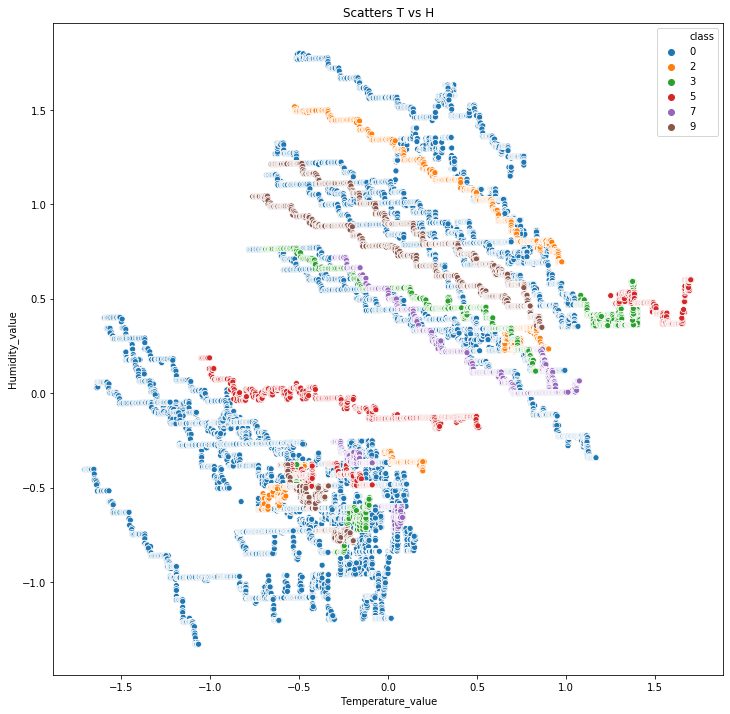

<Figure size 432x288 with 0 Axes>

In [95]:
x = X_ori['Temperature_value']
y = X_ori['Humidity_value']

fig = plt.figure(figsize=(12, 12), tight_layout=False)

sns.scatterplot(x=x, y=y, hue=df_class, legend='full', palette="tab10")
correlation = x.corr(y)
plt.title('Scatters T vs H')        
plt.show()
plt.clf()

In [105]:
# help(sns.scatterplot)

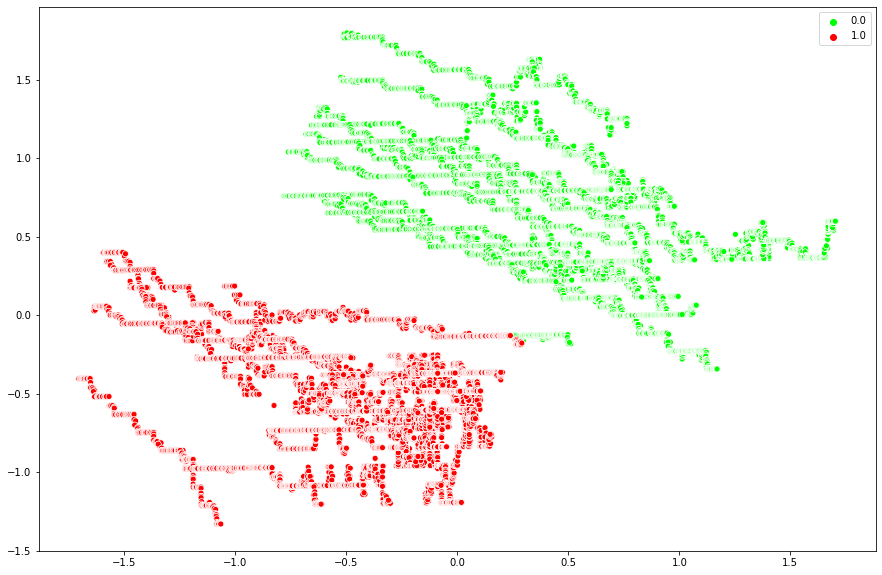

In [104]:
fig = plt.figure(figsize=(15, 10), tight_layout=False)
color_dict = dict({0: 'lime', 1: 'red'})
for label in set(model.labels_):
    sns.scatterplot(X[model.labels_==label, 0], X[model.labels_==label, 1], X[model.labels_==label, 2],  palette=color_dict)

In [35]:
# help(KMeans)

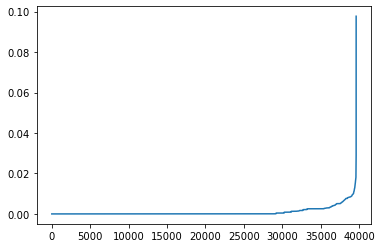

In [106]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_train)
distances, indices = nbrs.kneighbors(X_train)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.show()

In [112]:
model = DBSCAN(eps=0.06).fit(X_train)
len(set(model.labels_))

3

In [113]:
set(model.labels_)

{-1, 0, 1}

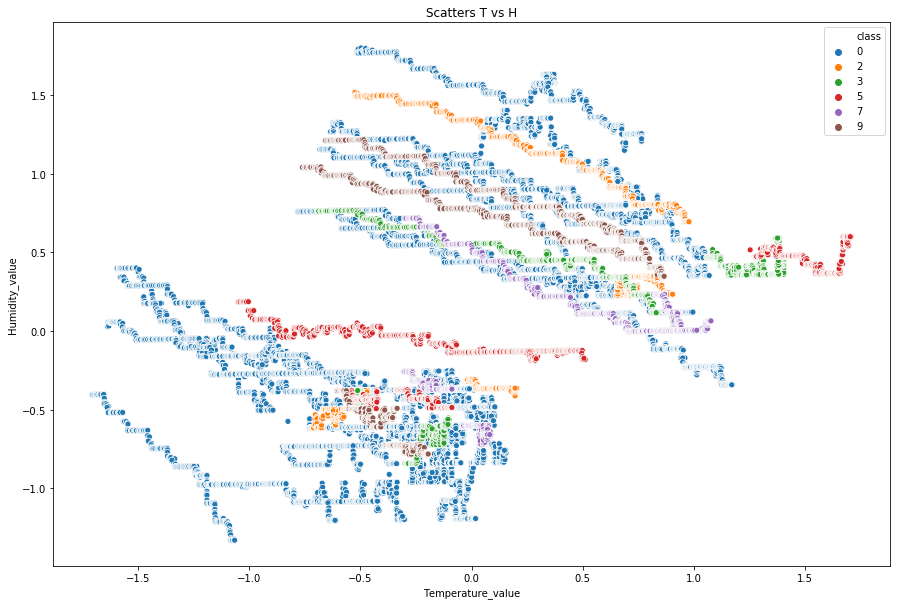

<Figure size 432x288 with 0 Axes>

In [108]:
x = X_ori['Temperature_value']
y = X_ori['Humidity_value']

fig = plt.figure(figsize=(15, 10), tight_layout=False)

sns.scatterplot(x=x, y=y, hue=df_class, legend='full', palette="tab10")
plt.title('Scatters T vs H')        
plt.show()
plt.clf()

In [115]:
X = pd.concat([X_data[['Temperature_value', 'Humidity_value']], pd.Series(model.labels_)], axis=1)
X = X.values
X

array([[-1.58121886,  0.34310532,  0.        ],
       [-1.58121886,  0.34310532,  0.        ],
       [-1.58121886,  0.34310532,  0.        ],
       ...,
       [-0.19543171, -0.78130201,  0.        ],
       [-0.19543171, -0.78130201,  0.        ],
       [-0.19543171, -0.78130201,  0.        ]])

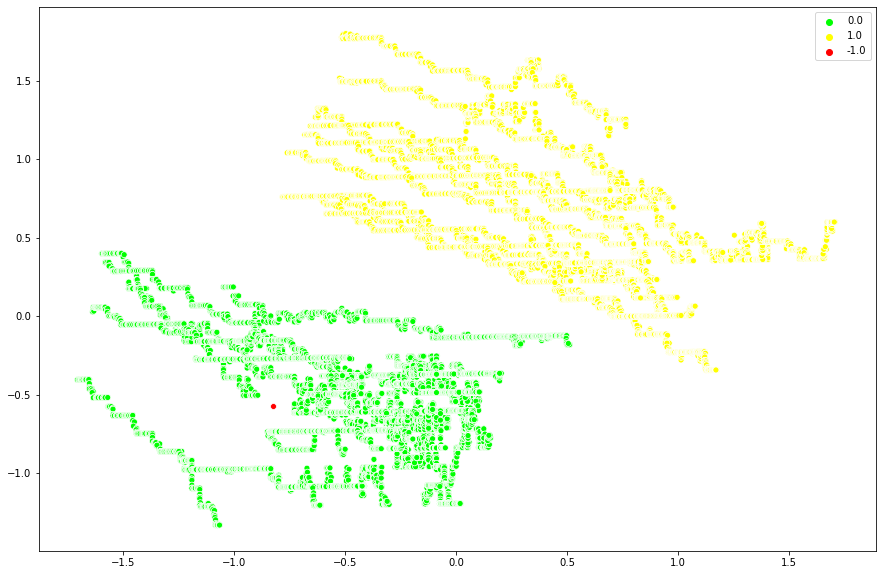

In [116]:
fig = plt.figure(figsize=(15, 10), tight_layout=False)
color_dict = dict({0: 'lime', 1: 'yellow', -1:"red"})
for label in set(model.labels_):
    sns.scatterplot(X[model.labels_==label, 0], X[model.labels_==label, 1], X[model.labels_==label, 2],  palette=color_dict)